# Importing Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Mediapipe KeyPoints 

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_hands = mp.solutions.hands

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):

    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

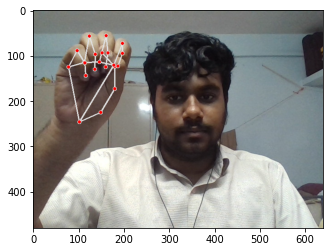

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # Printing the last recorded frame

# Get the Key Points from the Image

In [9]:
print(results.right_hand_landmarks)

landmark {
  x: 0.16008895635604858
  y: 0.514366090297699
  z: -2.5743548803802696e-07
}
landmark {
  x: 0.23417840898036957
  y: 0.4696831703186035
  z: -0.023674311116337776
}
landmark {
  x: 0.28147733211517334
  y: 0.360434889793396
  z: -0.03646206110715866
}
landmark {
  x: 0.2827163338661194
  y: 0.2585189938545227
  z: -0.05081978812813759
}
landmark {
  x: 0.23858383297920227
  y: 0.19785618782043457
  z: -0.0614641010761261
}
landmark {
  x: 0.2789028286933899
  y: 0.25375908613204956
  z: -0.008612227626144886
}
landmark {
  x: 0.30798280239105225
  y: 0.1525651216506958
  z: -0.04190392792224884
}
landmark {
  x: 0.30785518884658813
  y: 0.1990075707435608
  z: -0.06652920693159103
}
landmark {
  x: 0.2924630045890808
  y: 0.2563834488391876
  z: -0.07830981910228729
}
landmark {
  x: 0.22927896678447723
  y: 0.23781763017177582
  z: -0.013733395375311375
}
landmark {
  x: 0.2518654763698578
  y: 0.11752147972583771
  z: -0.04478256031870842
}
landmark {
  x: 0.25906023383

In [10]:
len(results.right_hand_landmarks.landmark)

21

In [11]:
def extract_keypoints(results):
   
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test # Contains only right hand points as the last frame recorded was right hand

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# Setup Folders for Collection

In [14]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['None','W', 'A', 'S','D','SPACE'])

# Thirty videos worth of data
no_sequences = 150

# Videos are going to be 1 frames in length
sequence_length = 1

# Folder start
start_folder = 1

In [16]:
for action in actions: 
    
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [17]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions - actions are the lables
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [18]:
# Incase of error use this lines of codes
cap.release() 
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
label_map

{'None': 0, 'W': 1, 'A': 2, 'S': 3, 'D': 4, 'SPACE': 5}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(900, 1, 126)

In [20]:
np.array(labels).shape

(900,)

In [21]:
X = np.array(sequences)

In [22]:
X.shape

(900, 1, 126)

In [23]:
y = to_categorical(labels).astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [25]:
print("y_test.shape",y_test.shape)
print("x_test.shape",X_test.shape)
print("y_train.shape",y_train.shape)
print("x_train.shape",X_train.shape)

y_test.shape (135, 6)
x_test.shape (135, 1, 126)
y_train.shape (765, 6)
x_train.shape (765, 1, 126)


# Build And Train The Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [27]:
accuracy_treshold = 0.95

In [28]:
class EarlyStop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}) :
    if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') >=accuracy_treshold ) :
      print('\nReached val accuracy treshold limit so cancelling training!')
      self.model.stop_training = True

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 3)
callback1 = EarlyStop()

In [30]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(1,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [31]:
#model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',#'Adagrad',
              metrics=['accuracy','mse'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             48896     
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 203,558
Trainable params: 203,558
Non-trai

In [34]:
Xcaliber=model.fit(X_train, y_train, epochs=150, callbacks=[callback1], verbose = 1,validation_data=(X_test, y_test))

Epoch 1/150
24/24 [==============================] - 6s 29ms/step - loss: 1.7874 - accuracy: 0.2170 - mse: 0.1386 - val_loss: 1.7672 - val_accuracy: 0.4074 - val_mse: 0.1375
Epoch 2/150
24/24 [==============================] - 0s 6ms/step - loss: 1.6110 - accuracy: 0.3203 - mse: 0.1287 - val_loss: 1.2918 - val_accuracy: 0.3481 - val_mse: 0.1167
Epoch 3/150
24/24 [==============================] - 0s 5ms/step - loss: 1.2708 - accuracy: 0.3281 - mse: 0.1130 - val_loss: 1.1362 - val_accuracy: 0.3333 - val_mse: 0.1077
Epoch 4/150
24/24 [==============================] - 0s 5ms/step - loss: 1.1897 - accuracy: 0.4418 - mse: 0.1084 - val_loss: 1.1037 - val_accuracy: 0.5185 - val_mse: 0.1042
Epoch 5/150
24/24 [==============================] - 0s 5ms/step - loss: 1.1421 - accuracy: 0.4641 - mse: 0.1054 - val_loss: 1.0790 - val_accuracy: 0.5259 - val_mse: 0.1055
Epoch 6/150
24/24 [==============================] - 0s 5ms/step - loss: 1.0827 - accuracy: 0.5542 - mse: 0.1013 - val_loss: 1.0580 - 

# Visualization

Accuracy during training =  0.9699346423149109
Accuracy during validation =  0.970370352268219
Loss during training =  0.20597514510154724
Loss during validation =  0.28702297806739807


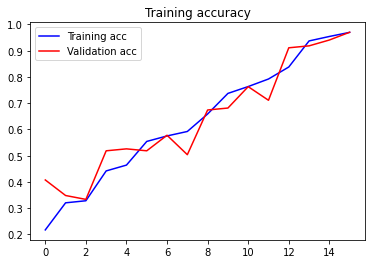

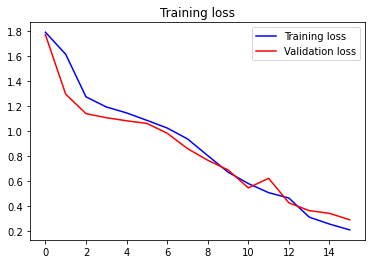

In [35]:
# Plot the accuracy and loss curves

acc = Xcaliber.history['accuracy']
val_acc = Xcaliber.history['val_accuracy']
loss = Xcaliber.history['loss']
val_loss = Xcaliber.history['val_loss']

print("Accuracy during training = ",acc[-1])
print("Accuracy during validation = ",val_acc[-1])
print("Loss during training = ",loss[-1])
print("Loss during validation = ",val_loss[-1])

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

# Make Predictions

In [36]:
res = model.predict(X_test)

In [37]:
actions[np.argmax(res[5])]

'S'

In [38]:
actions[np.argmax(y_test[5])]

'S'

# CheckPoint

In [39]:
model.save('actions.h5')

In [40]:
model.load_weights('actions.h5')

# Evaluation using Confusion Matrix and Accuracy

In [41]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [42]:
y_pred = model.predict(X_test)

In [43]:
ytrue = np.argmax(y_test, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()

In [44]:
cm = multilabel_confusion_matrix(ytrue, y_pred)
print(cm)

[[[109   2]
  [  0  24]]

 [[111   0]
  [  0  24]]

 [[113   0]
  [  0  22]]

 [[115   1]
  [  0  19]]

 [[103   1]
  [  2  29]]

 [[120   0]
  [  2  13]]]


In [45]:
accuracy_score(ytrue, y_pred)

0.9703703703703703

In [46]:
print(classification_report(ytrue, y_pred, target_names=label_map, digits=4))

              precision    recall  f1-score   support

        None     0.9231    1.0000    0.9600        24
           W     1.0000    1.0000    1.0000        24
           A     1.0000    1.0000    1.0000        22
           S     0.9500    1.0000    0.9744        19
           D     0.9667    0.9355    0.9508        31
       SPACE     1.0000    0.8667    0.9286        15

    accuracy                         0.9704       135
   macro avg     0.9733    0.9670    0.9690       135
weighted avg     0.9716    0.9704    0.9701       135



# Test in Real Time

In [47]:
from scipy import stats

In [50]:
colors = [(245,117,16), (117,245,16), (16,117,245), (25,40,245),(180,105,45),(75,200,45)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1) # Highlights the Correct prediction
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [57]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
predictions1 = []
co = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-1:]
        #sequence = sequence[-30:]
        
        temp = 0
        if keypoints[0] == 0 and keypoints[125] != 0:
            temp = 0
        elif keypoints[125] == 0 and keypoints[0] != 0:
            temp = 0
        else:
            temp = 1


        if temp == 0:
            if len(sequence) == 1:
            #if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))
                
                
            #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)
        elif temp ==1:
            kp1=[]
            kp2=[]
            sequence1 = []
            sequence2 = []
            for i in range(len(keypoints)):
                if i < len(keypoints)/2:
                    kp1.append(0)
                else:
                    kp1.append(1)
            
            for i in range(len(keypoints)):
                if i < len(keypoints)/2:
                    kp2.append(1)
                else:
                    kp2.append(0)

            for i in range(len(keypoints)):
                temp = keypoints[i]
                kp1[i] = kp1[i] * temp
                kp2[i] = kp2[i] * temp 

            sequence1.append(kp1)
            sequence1 = sequence1[-1:]

            sequence2.append(kp2)
            sequence2 = sequence2[-1:]

            if len(sequence1) == 1:
            #if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence1, axis=0))[0]
                res1 = model.predict(np.expand_dims(sequence2, axis=0))[0]
                print(actions[np.argmax(res)])
                print(actions[np.argmax(res1)])
                predictions.append(np.argmax(res))
                predictions1.append(np.argmax(res1))
                
                
            #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                                sentence.append(actions[np.argmax(res1)])
                        else:
                            sentence.append(actions[np.argmax(res)])
                            sentence.append(actions[np.argmax(res1)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)
                image = prob_viz(res1, actions, image, colors)
                
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None


In [52]:
keypoints[125]

-0.10856764018535614

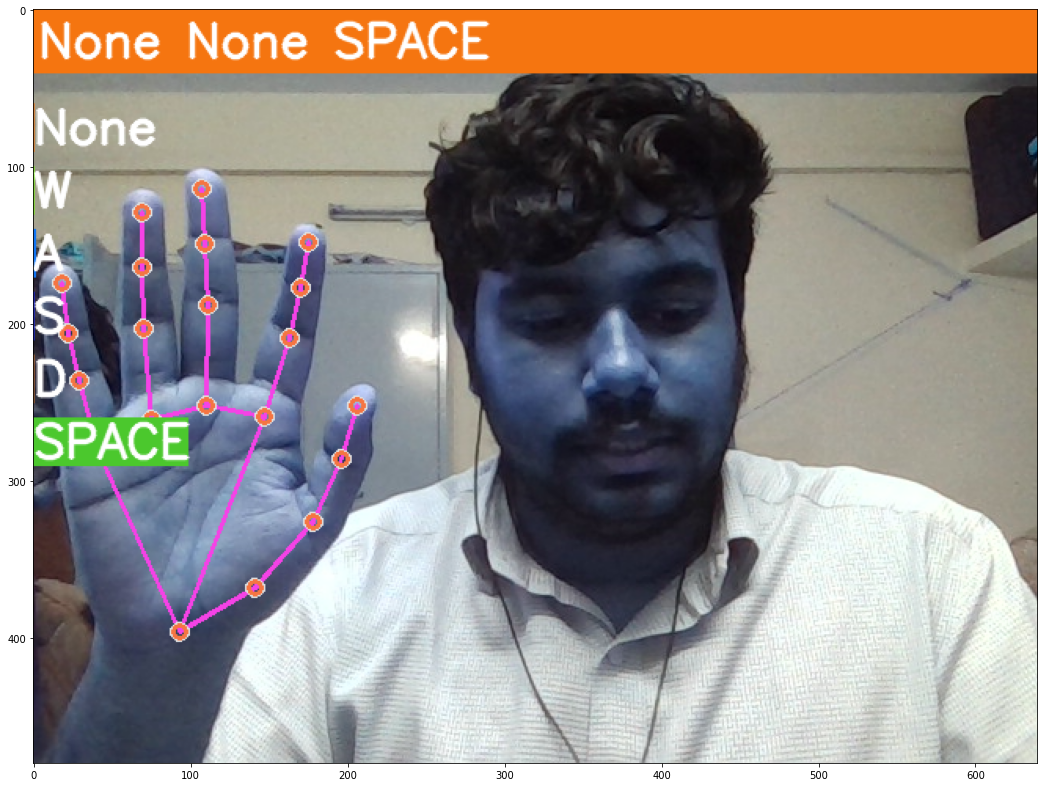

In [53]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

# Final Application

In [54]:
import keyinput
import time
font = cv2.FONT_HERSHEY_SIMPLEX

In [59]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
predictions1 = []
co = []
threshold = 0.5
temp = 0

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-1:]
        #sequence = sequence[-30:]
        
        
        if keypoints[0] == 0 and keypoints[125] != 0:
            temp = 0
            print("00000000000")
        elif keypoints[125] == 0 and keypoints[0] != 0:
            temp = 0
            print("00000000000")
        elif keypoints[0] != 0 and keypoints[125] != 0:
            temp = 1
            print("11111111111")
        elif keypoints[0] == 0 and keypoints[125] == 0:
            print("00000000000")
            temp = 0


        if temp == 0:
            if len(sequence) == 1:
            #if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                user_move = actions[np.argmax(res)]
                predictions.append(np.argmax(res))
                
                
            #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)
        elif temp ==1:
            kp1=[]
            kp2=[]
            sequence1 = []
            sequence2 = []
            for i in range(len(keypoints)):
                if i < len(keypoints)/2:
                    kp1.append(0)
                else:
                    kp1.append(1)
            
            for i in range(len(keypoints)):
                if i < len(keypoints)/2:
                    kp2.append(1)
                else:
                    kp2.append(0)

            for i in range(len(keypoints)):
                temps = keypoints[i]
                kp1[i] = kp1[i] * temps
                kp2[i] = kp2[i] * temps 

            sequence1.append(kp1)
            sequence1 = sequence1[-1:]

            sequence2.append(kp2)
            sequence2 = sequence2[-1:]

            if len(sequence1) == 1:
            #if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence1, axis=0))[0]
                res1 = model.predict(np.expand_dims(sequence2, axis=0))[0]
                print(actions[np.argmax(res)])
                print(actions[np.argmax(res1)])

                user_move1= actions[np.argmax(res)]
                user_move2= actions[np.argmax(res1)]
                print("UM1",user_move1)
                print("UM2",user_move2)

                predictions.append(np.argmax(res))
                predictions1.append(np.argmax(res1))
                
                
            #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                                sentence.append(actions[np.argmax(res1)])
                        else:
                            sentence.append(actions[np.argmax(res)])
                            sentence.append(actions[np.argmax(res1)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)
                image = prob_viz(res1, actions, image, colors)

        if temp == 1:
            print("Temp 1 cond")
            # WASD Mapping
            if user_move1 == 'D' and user_move2 == 'W':
                # When the slope is negative, we turn left.
                print("Turn right.")
                keyinput.release_key('s')
                keyinput.release_key('a')
                keyinput.press_key('d')                
                keyinput.press_key('w')
                
                
            elif user_move1 == 'A' and user_move2 == 'W':
                print("Turn left.")
                keyinput.release_key('s')
                keyinput.release_key('d')
                keyinput.press_key('a')                
                keyinput.press_key('w')
                
            elif user_move1 == 'A' and user_move2 == 'S':
                print("Turn left.")
                keyinput.press_key('s')
                keyinput.release_key('d')                
                keyinput.press_key('a')

            elif user_move1 == 'D' and user_move2 == 'S':
                print("Turn right.")
                keyinput.press_key('s')                
                keyinput.release_key('a')
                keyinput.press_key('d')

            elif user_move1 == 'SPACE' and user_move2 == 'W':
                # When the slope is negative, we turn left.
                print("Space.")
                keyinput.release_key('s')
                keyinput.release_key('a')
                keyinput.release_key('d')
                keyinput.press_key('SPACE')                
                keyinput.press_key('w')

            elif user_move1 == 'SPACE' and user_move2 == 'S':
                # When the slope is negative, we turn left.
                print("Space.")
                
                keyinput.release_key('a')
                keyinput.release_key('d')
                keyinput.press_key('SPACE')                
                keyinput.press_key('s')
                

            else:
                print("NULL")
                


            

        elif temp == 0:
            print("Temp 0")
            if user_move == 'W':
                print("keeping straight")
                keyinput.release_key('s')
                keyinput.release_key('a')
                keyinput.release_key('d')
                keyinput.press_key('w')
                

            elif user_move == 'S':
                print("keeping back")
                keyinput.release_key('a')
                keyinput.release_key('d')
                keyinput.release_key('w')
                keyinput.press_key('s')

            elif user_move == 'D':
                # When the slope is negative, we turn left.
                print("Turn right.")
                keyinput.release_key('s')
                keyinput.release_key('a')
                keyinput.press_key('d')

            elif user_move == 'A':
                print("Turn left.")
                keyinput.release_key('s')
                keyinput.release_key('d')
                keyinput.press_key('a')
                

            elif user_move == 'SPACE':
                print("Space.")
                keyinput.release_key('s')
                keyinput.release_key('d')
                keyinput.release_key('a')
                keyinput.press_key('SPACE')

            else:
                pass
                
            

            

            
                
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
00000000000
None
Temp 0
<class 'mediapipe.python.sol

KeyboardInterrupt: 

In [60]:
# Incase of error use this lines of codes
cap.release() 
cv2.destroyAllWindows()